In [1]:
import numpy as np

In [2]:
def distance(p1, p2):
    """Find the distances between points p1 and p2."""

    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

p1 = np.array([1, 1])
p2 = np.array([4, 4])

d = distance(p1, p2)

In [3]:
import random

def majority_vote(votes):
    """Return the most common element in votes."""
    
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1

    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)


    return random.choice(winners)

In [4]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]
winner = majority_vote(votes)

In [5]:
import scipy.stats as ss

def majority_vote(votes):
    """Return the most common element in votes."""
    
    mode, count = ss.mstats.mode(votes)
    return mode

In [6]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])

In [7]:
p = np.array([2.5, 2])

In [8]:
import matplotlib.pyplot as plt

(0.5, 3.5, 0.5, 3.5)

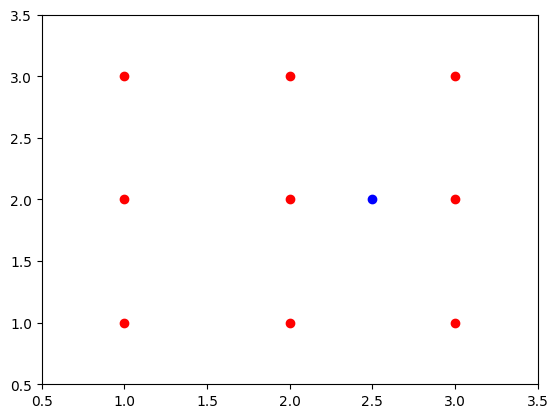

In [9]:
plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5, 3.5, 0.5, 3.5])

In [10]:
def find_nearest_neighbors(p, points, k=5):
    """Find the k nearest neighbors of point p and return their indices."""
    
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [11]:
ind = find_nearest_neighbors(p, points, 2)

In [12]:
points[ind]

array([[2, 2],
       [3, 2]])

In [13]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [14]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [15]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

array([1.])

In [16]:
def generate_synth_data(n=50):
    """Create two sets of points from bivariate normal distributions."""

    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))

    return (points, outcomes)

In [17]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point of the prediction grid."""

    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)

    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)

    return (xx, yy, prediction_grid)

In [18]:
def plot_prediction_grid (xx, yy, prediction_grid):
    """ Plot KNN predictions for every point on the grid."""

    from matplotlib.colors import ListedColormap

    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.grid(visible=True, which="major", axis="both")
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))

In [19]:
from sklearn import datasets

In [20]:
iris = datasets.load_iris()
predictors = iris.data[:, 0:2]
outcomes = iris.target

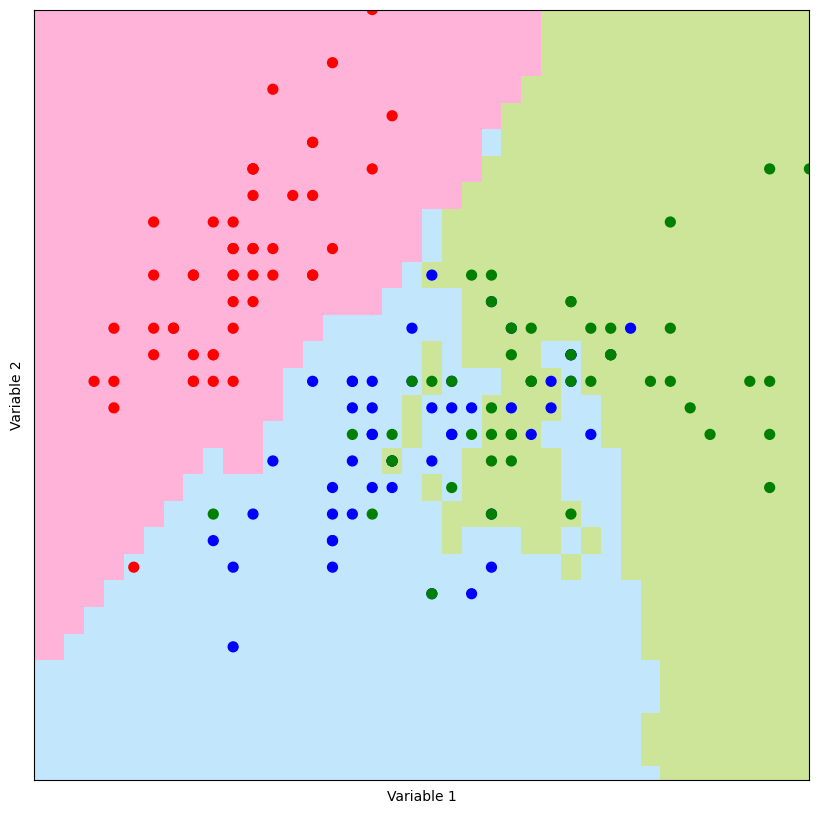

In [21]:
k = 5
limits = (4, 8, 1.5, 4.5)
h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)

In [25]:
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)